In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# ÌèâÍ∞ÄÍ∏∞Ï§Ä

## 1.TransformerÏôÄ ÎπÑÍµêÌï¥ Î≥ÄÍ≤ΩÏù¥ ÌïÑÏöîÌïú Î∂ÄÎ∂ÑÏùÑ ÏÑúÏà†ÌïòÏòÄÎã§.



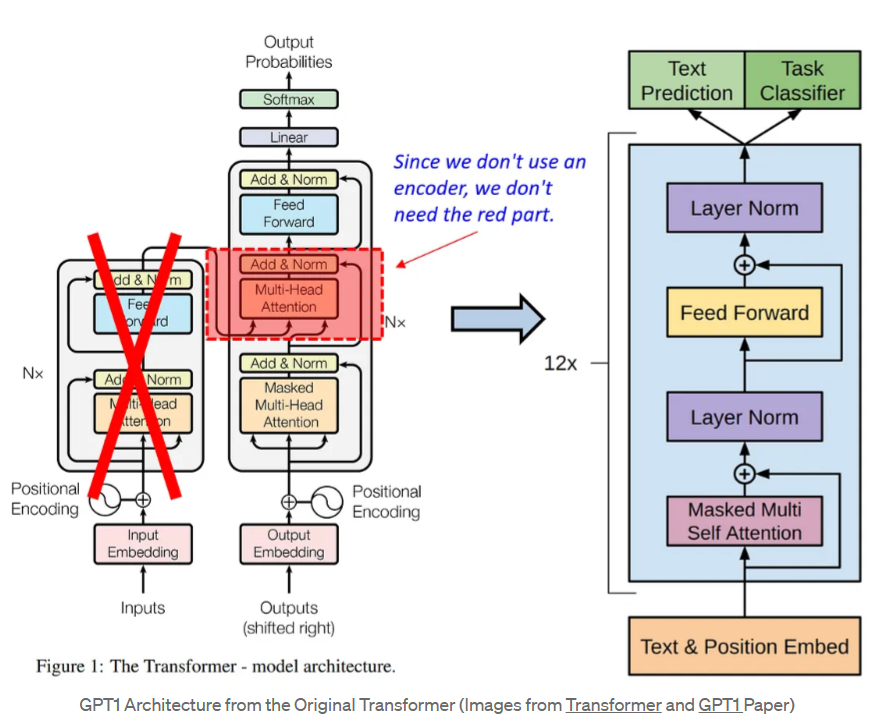

- Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçîÎ°ú Íµ¨ÏÑ±ÎêòÎäî Transformer Î™®Îç∏Í≥º Îã¨Î¶¨ GPTÎäî ÎîîÏΩîÎçîÎßå ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ Íµ¨ÏÑ±
- Transformer Î™®Îç∏ÏóêÏÑú Ïù∏ÏΩîÎçî(Ïù∏ÏΩîÎçî ÏÖÄÌîÑ Ïñ¥ÌÉ†ÏÖò)ÏôÄ Ïù∏ÏΩîÎçî Ï∂úÎ†•ÏùÑ ÏûÖÎ†•Î∞õÏïÑÏÑú Ï≤òÎ¶¨ÌïòÎäî Î∂ÄÎ∂Ñ(ÎîîÏΩîÎçîÏùò Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ïñ¥ÌÉ†ÏÖò) ÏÇ≠Ï†ú
- Ïù∏ÏΩîÎçî Í∞íÏùÑ Ï≤òÎ¶¨ÌïòÎäî ÎîîÏΩîÎçî ÏΩîÎìú ÏàòÏ†ï Î∞è gpt ÎßûÍ≤å ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ ÏàòÏ†ï
- TransformerÎäî Î¨∏Ïû• Ï†ÑÏ≤¥Î•º ÏûÖÎ†•Î∞õÏïÑÏÑú Îã§Ïùå ÎãµÎ≥ÄÏùÑ ÏÉùÏÑ±ÌïòÏßÄÎßå GPTÎäî Îã§Ïùå Îã®Ïñ¥Ïî© ÏòàÏ∏°ÌïòÎäî Autoregressive Î∞©ÏãùÏúºÎ°ú ÎèôÏûë

## 2. Î™®Îç∏Ïùò ÏûÖÎ†• ÌòïÌÉúÏóê ÎßûÍ≤å Ï†ÑÏ≤òÎ¶¨Î•º ÏàòÌñâÌïòÏòÄÎã§.

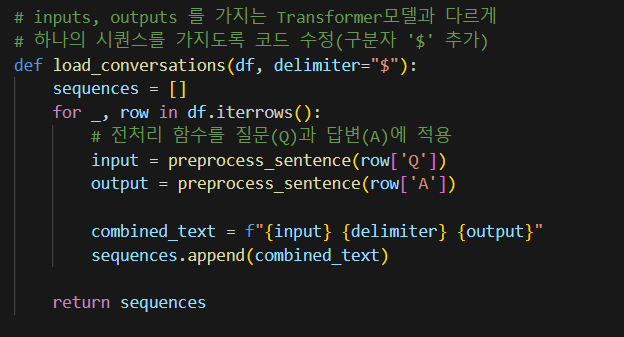

## 3.Î™®Îç∏Ïùò ÏûÖÎ†• Î∏îÎü≠ÏùÑ GPT ÎÖºÎ¨∏Ïóê Í∏∞Î∞òÌïòÏó¨ ÏàòÏ†ïÌïòÏòÄÎã§.

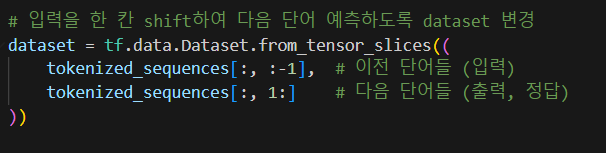

## 4.GPT Î™®Îç∏ÏùÑ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Íµ¨ÏÑ±ÌïòÏòÄÎã§. (model.summary, model.fit Í≤∞Í≥º Ï∫°Ï≤ò Ï≤®Î∂Ä)

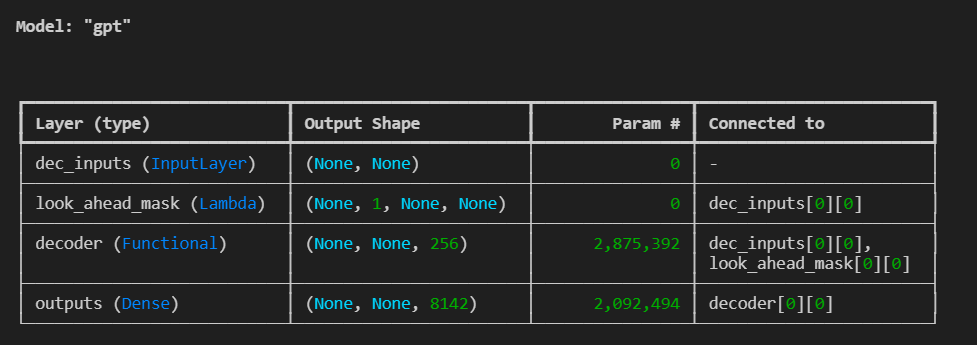

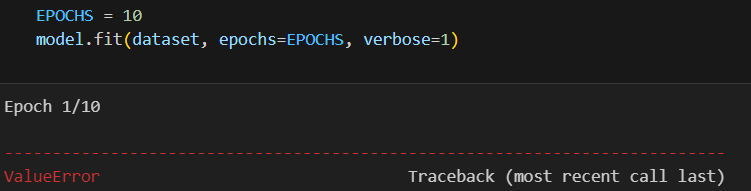

## 5.ÏûÖÎ†•Ïóê Îî∞Î•∏ Ï∂úÎ†•Ïù¥ ÏÉùÏÑ±ÎêòÏóàÎã§.

# ÏΩîÎìú Íµ¨ÌòÑ

## Step 1. Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÌïòÍ∏∞

ÌïúÍµ≠Ïñ¥ Ï±óÎ¥á Îç∞Ïù¥ÌÑ∞Îäî ÏÜ°ÏòÅÏàôÎãòÏù¥ Í≥µÍ∞úÌïú Ï±óÎ¥á Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©. songys/Chatbot_data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
import pandas as pd

path_to_dataset = '/content/drive/MyDrive/data'

path_to_kor = os.path.join(path_to_dataset, 'ChatbotData.csv')


chatbot_df = pd.read_csv(path_to_kor)
chatbot_df.head()

Q            A  label
0           12Ïãú Îï°!   ÌïòÎ£®Í∞Ä Îòê Í∞ÄÎÑ§Ïöî.      0
1      1ÏßÄÎßù ÌïôÍµê Îñ®Ïñ¥Ï°åÏñ¥    ÏúÑÎ°úÌï¥ ÎìúÎ¶ΩÎãàÎã§.      0
2     3Î∞ï4Ïùº ÎÜÄÎü¨Í∞ÄÍ≥† Ïã∂Îã§  Ïó¨ÌñâÏùÄ Ïñ∏Ï†úÎÇò Ï¢ãÏ£†.      0
3  3Î∞ï4Ïùº Ï†ïÎèÑ ÎÜÄÎü¨Í∞ÄÍ≥† Ïã∂Îã§  Ïó¨ÌñâÏùÄ Ïñ∏Ï†úÎÇò Ï¢ãÏ£†.      0
4          PPL Ïã¨ÌïòÎÑ§   ÎààÏÇ¥Ïù¥ Ï∞åÌë∏Î†§ÏßÄÏ£†.      0

In [6]:
len(chatbot_df)

11823

## Step 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ÌïòÍ∏∞
1. ÎåÄÏÜåÎ¨∏Ïûê ÌÜµÏùºÏù¥ Î∂àÌïÑÏöî(ÏÇ≠Ï†ú)
2. Ï†ÑÏ≤òÎ¶¨ Ïãú Îç∞Ïù¥ÌÑ∞ ÌïúÍ∏ÄÎßå ÎÇ®Í∏∞ÎèÑÎ°ù Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©([^Í∞Ä-Ìû£.,?!])
3. Í∏∞Ï°¥ ÌååÏùºÏóêÏÑú ÏßÅÏ†ë ÏóÖÎ°úÎìúÌïòÎäî ÌòïÏãù -> Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌòïÏãùÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Ìï∏Îì§ÎßÅ

In [7]:
def preprocess_sentence(sentence):
    # ÏñëÏ™Ω Í≥µÎ∞±ÏùÑ Ï†úÍ±∞
    sentence = sentence.strip()

    # Îã®Ïñ¥ÏôÄ Íµ¨ÎëêÏ†ê(punctuation) ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨Î•º ÎßåÎì≠ÎãàÎã§.
    # ÏòàÎ•º Îì§Ïñ¥ÏÑú "I am a student." => "I am a student ."ÏôÄ Í∞ôÏù¥
    # studentÏôÄ Ïò®Ï†ê ÏÇ¨Ïù¥Ïóê Í±∞Î¶¨Î•º ÎßåÎì≠ÎãàÎã§.
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)

    # (Í∞Ä-Ìû£, ".", "?", "!", ",")Î•º Ï†úÏô∏Ìïú Î™®Îì† Î¨∏ÏûêÎ•º Í≥µÎ∞±Ïù∏ ' 'Î°ú ÎåÄÏ≤¥Ìï©ÎãàÎã§.
    sentence = re.sub(r"[^Í∞Ä-Ìû£.,?!]", " ", sentence)
    sentence = sentence.strip()
    return sentence

In [24]:
# inputs, outputs Î•º Í∞ÄÏßÄÎäî TransformerÎ™®Îç∏Í≥º Îã§Î•¥Í≤å
# ÌïòÎÇòÏùò ÏãúÌÄÄÏä§Î•º Í∞ÄÏßÄÎèÑÎ°ù ÏΩîÎìú ÏàòÏ†ï(Íµ¨Î∂ÑÏûê '$' Ï∂îÍ∞Ä)
def load_conversations(df, delimiter="$"):
    sequences = []
    for _, row in df.iterrows():
        # Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÎ•º ÏßàÎ¨∏(Q)Í≥º ÎãµÎ≥Ä(A)Ïóê Ï†ÅÏö©
        input = preprocess_sentence(row['Q'])
        output = preprocess_sentence(row['A'])

        combined_text = f"{input} {delimiter} {output}"
        sequences.append(combined_text)

    return sequences

In [33]:
# Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÍ≥† Ï†ÑÏ≤òÎ¶¨ÌïòÏó¨ ÏßàÎ¨∏ÏùÑ questions, ÎãµÎ≥ÄÏùÑ answersÏóê Ï†ÄÏû•Ìï©ÎãàÎã§.
input_texts = load_conversations(chatbot_df)
print('Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò :', len(input_texts))

Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò : 11823


In [34]:
print('Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò 22Î≤àÏß∏ ÏÉòÌîå: {}'.format(input_texts[21]))

Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò 22Î≤àÏß∏ ÏÉòÌîå: Í∞ÄÏä§ÎπÑ Ïû•ÎÇú ÏïÑÎãò $ Îã§Ïùå Îã¨ÏóêÎäî Îçî Ï†àÏïΩÌï¥Î¥êÏöî .


## Step 3. SubwordTextEncoder ÏÇ¨Ïö©ÌïòÍ∏∞
- ÌïúÍµ≠Ïñ¥ Îç∞Ïù¥ÌÑ∞Îäî ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌÜ†ÌÅ¨ÎÇòÏù¥ÏßïÏùÑ Ìï¥Ïïº ÌïúÎã§Í≥† ÎßéÏùÄ Î∂ÑÏù¥ ÏïåÍ≥† ÏûàÏäµÎãàÎã§.
- ÌïòÏßÄÎßå Ïó¨Í∏∞ÏÑúÎäî ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Í∞Ä ÏïÑÎãå ÏúÑ Ïã§ÏäµÏóêÏÑú ÏÇ¨Ïö©ÌñàÎçò ÎÇ¥Î∂Ä Îã®Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÏù∏ SubwordTextEncoderÎ•º Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©Ìï¥Î≥¥ÏÑ∏Ïöî.



In [35]:
import tensorflow_datasets as tfds

# ÏßàÎ¨∏Í≥º ÎãµÎ≥Ä Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌï¥ÏÑú Vocabulary ÏÉùÏÑ±ÌñàÎçò Í∏∞Ï°¥Í≥º Îã¨Î¶¨
# ÌïòÎÇòÏùò sequences(input_texts)Ïóê ÎåÄÌïú Vocab ÏÉùÏÑ±
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(input_texts, target_vocab_size=2**13)
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

print('START_TOKENÏùò Î≤àÌò∏ :' ,[tokenizer.vocab_size])
print('END_TOKENÏùò Î≤àÌò∏ :' ,[tokenizer.vocab_size + 1])

START_TOKENÏùò Î≤àÌò∏ : [8140]
END_TOKENÏùò Î≤àÌò∏ : [8141]


In [36]:
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8142


In [37]:
print('Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÏÉòÌîå: {}'.format(tokenizer.encode(input_texts[21])))

Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÏÉòÌîå: [5755, 617, 2495, 4159, 2, 2364, 7490, 9, 6256, 100, 1]


In [107]:
# ÏÉòÌîåÏùò ÏµúÎåÄ ÌóàÏö© Í∏∏Ïù¥ ÎòêÎäî Ìå®Îî© ÌõÑÏùò ÏµúÏ¢Ö Í∏∏Ïù¥
MAX_LENGTH = 40
print(MAX_LENGTH)

40


In [108]:
# gptÎäî Ìå®Îî©Ïù¥ ÌïÑÏöîÏóÜÏúºÎØÄÎ°ú ÏãúÏûë, Ï¢ÖÎ£å ÌÜ†ÌÅ∞Îßå Ï∂îÍ∞Ä
def tokenize_and_filter(input_texts, add_special_tokens=False):
    tokenized_sequences = []

    for sentence in input_texts:
        tokenized_sentence = START_TOKEN+ tokenizer.encode(sentence) + END_TOKEN
        tokenized_sequences.append(tokenized_sentence)

    # Î™®Îì† ÏãúÌÄÄÏä§Î•º max_lengthÎ°ú Ìå®Îî© (Î∞∞Ïπò Ï≤òÎ¶¨ Ïãú ÌïÑÏöî)
    tokenized_sequences = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_sequences, maxlen=MAX_LENGTH, padding='post')

    return tokenized_sequences

In [109]:
# # gptÎäî Ìå®Îî©Ïù¥ ÌïÑÏöîÏóÜÏúºÎØÄÎ°ú ÏãúÏûë, Ï¢ÖÎ£å ÌÜ†ÌÅ∞Îßå Ï∂îÍ∞Ä
# def tokenize_and_filter(input_texts, add_special_tokens=False):
#     tokenized_sequences = []

#     for sentence in input_texts:
#         tokenized_sentence = START_TOKEN+ tokenizer.encode(sentence) + END_TOKEN
#         tokenized_sequences.append(tokenized_sentence)

#     return tokenized_sequences

In [110]:
tokenized_sequences = tokenize_and_filter(input_texts)
print('Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ :',(VOCAB_SIZE))
print('ÏÉòÌîå Í∞úÏàò: {}'.format(len(tokenized_sequences)))

Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ : 8142
ÏÉòÌîå Í∞úÏàò: 11823


## Step 4. Î™®Îç∏ Íµ¨ÏÑ±ÌïòÍ∏∞
ÏúÑ Ïã§Ïäµ ÎÇ¥Ïö©ÏùÑ Ï∞∏Í≥†ÌïòÏó¨ Ìä∏ÎûúÏä§Ìè¨Î®∏ Î™®Îç∏ÏùÑ Íµ¨ÌòÑÌï©ÎãàÎã§.

### PositionalEncoding()
Î¨∏Ïû• ÎÇ¥ Îã®Ïñ¥ ÏúÑÏπò Ï†ïÎ≥¥Î•º Ïù∏ÏΩîÎî©

In [85]:
# Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî© Î†àÏù¥Ïñ¥
class PositionalEncoding(tf.keras.layers.Layer):

    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        # Í∞ÅÎèÑ Î∞∞Ïó¥ ÏÉùÏÑ±
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)

        # Î∞∞Ïó¥Ïùò ÏßùÏàò Ïù∏Îç±Ïä§ÏóêÎäî sin Ìï®Ïàò Ï†ÅÏö©
        sines = tf.math.sin(angle_rads[:, 0::2])
        # Î∞∞Ïó¥Ïùò ÌôÄÏàò Ïù∏Îç±Ïä§ÏóêÎäî cosine Ìï®Ïàò Ï†ÅÏö©
        cosines = tf.math.cos(angle_rads[:, 1::2])

        # sinÍ≥º cosineÏù¥ ÍµêÏ∞®ÎêòÎèÑÎ°ù Ïû¨Î∞∞Ïó¥
        pos_encoding = tf.stack([sines, cosines], axis=0)
        pos_encoding = tf.transpose(pos_encoding,[1, 2, 0])
        pos_encoding = tf.reshape(pos_encoding, [position, d_model])

        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    # def call(self, inputs):
    #     return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]
    def call(self, inputs):
        # üö® SparseTensor ‚Üí Dense Tensor Î≥ÄÌôò Ï∂îÍ∞Ä
        if isinstance(inputs, tf.SparseTensor):
            inputs = tf.sparse.to_dense(inputs)

        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

### scaled_dot_product_attention()
Ïñ¥ÌÖêÏÖò Ï†êÏàò Í≥ÑÏÇ∞(Q,K,V)

In [65]:
# Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò Ìï®Ïàò
def scaled_dot_product_attention(query, key, value, mask):
    # Ïñ¥ÌÖêÏÖò Í∞ÄÏ§ëÏπòÎäî QÏôÄ KÏùò Îã∑ ÌîÑÎ°úÎçïÌä∏
    matmul_qk = tf.matmul(query, key, transpose_b=True)

    # Í∞ÄÏ§ëÏπòÎ•º Ï†ïÍ∑úÌôî
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)

    # Ìå®Îî©Ïóê ÎßàÏä§ÌÅ¨ Ï∂îÍ∞Ä
    if mask is not None:
        logits += (mask * -1e9)

    # softmaxÏ†ÅÏö©
    attention_weights = tf.nn.softmax(logits, axis=-1)

    # ÏµúÏ¢Ö Ïñ¥ÌÖêÏÖòÏùÄ Í∞ÄÏ§ëÏπòÏôÄ VÏùò Îã∑ ÌîÑÎ°úÎçïÌä∏
    output = tf.matmul(attention_weights, value)
    return output

### MultiHeadAttention()
Ïñ¥ÌÉ†ÏÖò Î≥ëÎ†¨ ÏàòÌñâ


In [66]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        self.dense = tf.keras.layers.Dense(units=d_model)

    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])

    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs[
            'value'], inputs['mask']
        batch_size = tf.shape(query)[0]

        # Q, K, VÏóê Í∞ÅÍ∞Å DenseÎ•º Ï†ÅÏö©Ìï©ÎãàÎã§
        query = self.query_dense(query)
        key = self.query_dense(key)
        value = self.query_dense(value)

        # Î≥ëÎ†¨ Ïó∞ÏÇ∞ÏùÑ ÏúÑÌïú Î®∏Î¶¨Î•º Ïó¨Îü¨ Í∞ú ÎßåÎì≠ÎãàÎã§
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        # Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò Ìï®Ïàò
        scaled_attention = scaled_dot_product_attention(query, key, value, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # Ïñ¥ÌÖêÏÖò Ïó∞ÏÇ∞ ÌõÑÏóê Í∞Å Í≤∞Í≥ºÎ•º Îã§Ïãú Ïó∞Í≤∞(concatenate)Ìï©ÎãàÎã§
        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model))

        # ÏµúÏ¢Ö Í≤∞Í≥ºÏóêÎèÑ DenseÎ•º Ìïú Î≤à Îçî Ï†ÅÏö©Ìï©ÎãàÎã§
        outputs = self.dense(concat_attention)

        return outputs

### create_padding_mask()
Ìå®Îî©Îêú Î∂ÄÎ∂Ñ Î¨¥Ïãú(0ÏúºÎ°ú Îêú ÌÜ†ÌÅ∞ÏùÑ 1Î°ú ÌëúÏãú. Í≥ÑÏÇ∞ Ïãú Ìå®Îî© ÏòÅÌñ• Ï†úÍ±∞)

In [67]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # (batch_size, 1, 1, sequence length)
    return mask[:, tf.newaxis, tf.newaxis, :]

### create_look_ahead_mask()
ÎîîÏΩîÎçîÍ∞Ä ÎØ∏Îûò Îã®Ïñ¥Î•º Ï∞∏Í≥†ÌïòÏßÄ ÏïäÎèÑÎ°ù ÎßàÏä§ÌÇπ

In [68]:
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)
    return tf.maximum(look_ahead_mask, padding_mask)

### decoder_layer()
Îã®Ïùº ÎîîÏΩîÎçî Ï∏µ

In [69]:
# Ïù∏ÏΩîÎçî Í¥ÄÎ†® ÏûÖÎ†• ÏÇ≠Ï†ú
# enc_outputs, padding_mask, attention2(Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ïñ¥ÌÖêÏÖò)
# Í∏∞Ï°¥ attention2Î•º Ï†úÍ±∞ÌïòÍ≥† attention1ÏôÄ Îã§Ïùå Ï∏µÏùÑ Ïó∞Í≤∞

def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")

    # Ï≤´ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò ÏàòÌñâ (ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò)
    attention1 = MultiHeadAttention(
        d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
        })

    # Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏùò Í≤∞Í≥ºÎäî LayerNormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
    attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

    # ÏÑ∏ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : 2Í∞úÏùò ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention1)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µÏùò Í≤∞Í≥ºÎäî DropoutÍ≥º LayerNormalization ÏàòÌñâ
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(outputs + attention1)

    return tf.keras.Model(
        inputs=[inputs, look_ahead_mask],
        outputs=outputs,
        name=name)

### decoder()
Ïó¨Îü¨ ÎîîÏΩîÎçî Ï∏µÏùÑ ÏåìÏùÄ ÎîîÏΩîÎçî

In [70]:
# Ïù∏ÏΩîÎçî Í¥ÄÎ†® ÏΩîÎìú Ï†úÍ±∞
# enc_outputs,  padding_mask
# **padding_mask** : transformerÎäî Î™®Îì† Îã®Ïñ¥Î•º ÌïúÎ≤àÏóê Í≥ÑÏÇ∞, gptÎäî Ïù¥Ï†Ñ Îã®Ïñ¥Îì§ÏùÑ Í∏∞Î∞òÏúºÎ°ú Îã§Ïùå Îã®Ïñ¥Îì§ ÏàúÏ∞®Ï†Å ÏòàÏ∏°, Ï¶â ÏãúÌÄÄÏä§ ÎÅùÍπåÏßÄ ÎèÑÎã¨ÌïòÍ∏∞Ï†ÑÏóê ÏòàÏ∏° Ï¢ÖÎ£åÎêòÍ∏∞ÎïåÎ¨∏Ïóê Ìå®Îî©Ïù¥ ÌïÑÏöîÍ∞ÄÏóÜÏùå

def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')

    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name='look_ahead_mask')

    # Ìå®Îî© ÎßàÏä§ÌÅ¨
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    # DropoutÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    for i in range(num_layers):
        outputs = decoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name='decoder_layer_{}'.format(i),
        )(inputs=[outputs, look_ahead_mask])

    return tf.keras.Model(
        inputs=[inputs, look_ahead_mask],
        outputs=outputs,name=name)

### gpt()
ÎîîÏΩîÌÑ∞Î•º Î≥ÄÌôòÌïú ÏµúÏ¢Ö Î™®Îç∏

In [71]:
# transformer -> gpt
# gptÎäî ÎîîÏΩîÎçî Î∂ÄÎ∂ÑÎßå ÏÇ≠Ï†ú
# Ïù∏ÏΩîÎçî Î∂ÄÎ∂Ñ ÏÇ≠Ï†ú -> Ïù∏ÏΩîÎçî Ïñ¥ÌÉ†ÏÖò, Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ïñ¥ÌÉ†ÏÖò Î∂ÄÎ∂Ñ ÏÇ≠Ï†ú ÌïÑÏöî
# inputs, enc_outputs, enc_padding_mask, dec_padding_mask... ÏÇ≠Ï†ú

def gpt(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="gpt"):
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # ÎîîÏΩîÎçîÏóêÏÑú ÎØ∏ÎûòÏùò ÌÜ†ÌÅ∞ÏùÑ ÎßàÏä§ÌÅ¨ ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    # ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú Ìå®Îî© ÎßàÏä§ÌÅ¨ÎèÑ Ìè¨Ìï®ÎêòÏñ¥Ï†∏ ÏûàÏäµÎãàÎã§.
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask,
        output_shape=(1, None, None),
        name='look_ahead_mask')(dec_inputs)

    # ÎîîÏΩîÎçî
    dec_outputs = decoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
    )(inputs=[dec_inputs, look_ahead_mask])

    # ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=dec_inputs, outputs=outputs, name=name)

### Î™®Îç∏ Ïª¥ÌååÏùº Î∞è ÌïôÏäµ

In [115]:
# gptÎäî AutogressiveÎ∞©ÏãùÏù¥ÎØÄÎ°ú ÌïúÏπ∏Ïî© ÏòàÏ∏°Ìï¥ÏïºÌï®
# Ïù¥Ï†Ñ Îã®Ïñ¥Î•º Í∏∞Î∞òÏúºÎ°ú Îã§Ïùå Îã®Ïñ¥Î•º ÏòàÏ∏°Ìï¥ÏïºÌïòÎäî Íµ¨Ï°∞ÎùºÏÑú y_trueÎäî ÌïúÏπ∏ shiftÌïòÏó¨ ÏòàÏ∏°Ìï®
# Ìå®Îî©ÏùÑ Í≥†Î†§Ìï† ÌïÑÏöîÍ∞Ä ÏóÜÍ∏∞Ïóê mask Ï†úÍ±∞
def loss_function(y_true, y_pred):
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')(y_true, y_pred)


    return tf.reduce_mean(loss)

In [96]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step, tf.float32)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

Text(0.5, 0, 'Train Step')

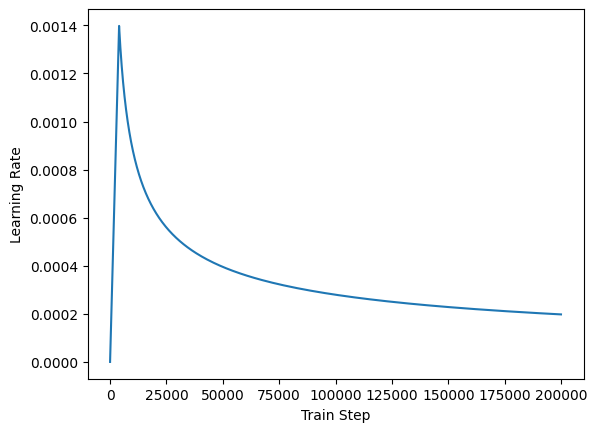

In [97]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [111]:
import tensorflow as tf

BATCH_SIZE = 64
BUFFER_SIZE = 20000

# ÏûÖÎ†•ÏùÑ Ìïú Ïπ∏ shiftÌïòÏó¨ Îã§Ïùå Îã®Ïñ¥ ÏòàÏ∏°ÌïòÎèÑÎ°ù dataset Î≥ÄÍ≤Ω
dataset = tf.data.Dataset.from_tensor_slices((
    tokenized_sequences[:, :-1],  # Ïù¥Ï†Ñ Îã®Ïñ¥Îì§ (ÏûÖÎ†•)
    tokenized_sequences[:, 1:]    # Îã§Ïùå Îã®Ïñ¥Îì§ (Ï∂úÎ†•, Ï†ïÎãµ)
))


dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
# batch() ‚Üí padded_batch() ÏÇ¨Ïö© (SparseTensor Î∞©ÏßÄ)
dataset = dataset.padded_batch(BATCH_SIZE, padding_values=0, drop_remainder=True)

dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [99]:
# import tensorflow as tf

# BATCH_SIZE = 64
# BUFFER_SIZE = 20000

# # ÏûÖÎ†•ÏùÑ Ìïú Ïπ∏ shiftÌïòÏó¨ Îã§Ïùå Îã®Ïñ¥ ÏòàÏ∏°ÌïòÎèÑÎ°ù dataset Î≥ÄÍ≤Ω
# dataset = tf.data.Dataset.from_generator(
#     lambda: ((seq[:-1], seq[1:]) for seq in tokenized_sequences),
#     output_signature=(
#         tf.TensorSpec(shape=(None,), dtype=tf.int32),  # ÏûÖÎ†• (Í∞ÄÎ≥Ä Í∏∏Ïù¥)
#         tf.TensorSpec(shape=(None,), dtype=tf.int32)   # Ï†ïÎãµ (Í∞ÄÎ≥Ä Í∏∏Ïù¥)
#     )
# )

# dataset = dataset.cache()
# dataset = dataset.shuffle(BUFFER_SIZE)
# dataset = dataset.batch(BATCH_SIZE)
# dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

- Ìï¥Îãπ ÏΩîÎìú ÏàòÏ†ï ÎãπÏãú Í∏∏Ïù¥Í∞Ä Îã§Î•∏ Î¶¨Ïä§Ìä∏Î°ú Íµ¨ÏÑ±ÎêòÏñ¥ÏûàÏñ¥ÏÑú numpyÎ°ú Î≥ÄÌôòÌïòÎäî Í≥ºÏ†ïÏóêÏÑú ÏóêÎü¨Î∞úÏÉù.
- ÎÑòÌååÏù¥ Î∞∞Ïó¥Ïù¥ ÎèôÏùºÌïú Í∏∏Ïù¥Î•º Í∞ÄÏ†∏ÏïºÌïòÏßÄÎßå gpt Î™®Îç∏ ÌäπÏÑ±ÏÉÅ Ìå®Îî©Ïù¥ Î∂àÌïÑÏöîÌïòÎã§Í≥† ÏÉùÍ∞ÅÌïòÏó¨ Í∏∏Ïù¥Í∞Ä ÏùºÏ†ïÌïòÏßÄ ÏïäÏïòÏùå
- tf.data.Dataset.from_generator() Î•º ÏÇ¨Ïö©ÌïòÏó¨ Í∞ÄÎ≥Ä Í∏∏Ïù¥ ÏãúÌÄÄÏä§ Ï≤òÎ¶¨ÌïòÎèÑÎ°ù Î≥ÄÍ≤ΩÌï®
- Ïù¥ÌõÑ Î™®Îç∏ Íµ¨Ï°∞ ÏÑ§Í≥ÑÌï† Îïå - PositionalEncoding() ÏóêÏÑú ÏûÖÎ†•Í∞íÍ≥º pos_encodingÌïòÎäî Î∂ÄÎ∂ÑÏóêÏÑú SparseTensor ÏóêÎü¨ Î∞úÏÉù
- Í≤∞Î°† : GPT Î™®Îç∏ ÌïôÏäµÏóî Ìå®Îî©Ïù¥ ÌïÑÏöîÏóÜÏßÄÎßå Î∞∞Ïπò ÏÉùÏÑ±ÏôÄ Ïñ¥ÌÉ†ÏÖò Ïó∞ÏÇ∞ Ïãú Ìå®Îî©Ïù¥ ÌïÑÏöîÌïòÍ∏∞Ïóê MAX_LENGTHÎ•º Ï∂îÍ∞ÄÎ°ú Íµ¨Ìï¥ÏÑú Ìå®Îî©Ï≤òÎ¶¨Ìï¥Ï§å

In [112]:
tf.keras.backend.clear_session()

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
NUM_LAYERS = 2 # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçîÏùò Ï∏µÏùò Í∞úÏàò
D_MODEL = 256 # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçî ÎÇ¥Î∂ÄÏùò ÏûÖ, Ï∂úÎ†•Ïùò Í≥†Ï†ï Ï∞®Ïõê
NUM_HEADS = 8 # Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏóêÏÑúÏùò Ìó§Îìú Ïàò
UNITS = 512 # ÌîºÎìú Ìè¨ÏõåÎìú Ïã†Í≤ΩÎßùÏùò ÏùÄÎãâÏ∏µÏùò ÌÅ¨Í∏∞
DROPOUT = 0.1 # ÎìúÎ°≠ÏïÑÏõÉÏùò ÎπÑÏú®

model = gpt(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "gpt"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)              ‚îÉ Output Shape           ‚îÉ        Param # ‚îÉ Connected to           ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dec_inputs (InputLayer)   ‚îÇ (None, None)           ‚îÇ              0 ‚îÇ -                      ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ look_ahead_mask (Lambda)  ‚îÇ (None, 1, None, None)  ‚îÇ              0 ‚îÇ dec_inputs[0][0]       ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ decoder (Functional)      ‚îÇ (None, None, 256)      ‚îÇ      2,875,392 ‚îÇ dec_inputs[0][0],      ‚îÇ
‚îÇ                           ‚îÇ                        ‚îÇ                ‚îÇ look_ahead_mask[0][0]  ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ outputs (Dense)           ‚îÇ (None, None, 8142)     ‚îÇ      2,092,494 ‚îÇ decoder[0][0]          ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 4,967,886 (18.95 MB)

 Trainable params: 4,967,886 (18.95 MB)

 Non-trainable params: 0 (0.00 B)

In [120]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)


def accuracy(y_true, y_pred):
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, tf.argmax(y_pred, axis=-1))


dataset = dataset.map(lambda x, y: (x, y[:, :-1]))

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [121]:
EPOCHS = 10
model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape up until the last dimension: target.shape=(64, 37), output.shape=(64, 39, 8142)

In [ ]:
def decoder_inference(sentence, model):
    sentence = preprocess_sentence(sentence)

    # ÏûÖÎ†•Îêú Î¨∏Ïû•ÏùÑ Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑ, ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ ÏïûÎí§Î°ú Ï∂îÍ∞Ä.
    # ex) Where have you been? ‚Üí [[8331   86   30    5 1059    7 8332]]
    sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

    # ÎîîÏΩîÎçîÏùò ÌòÑÏû¨ÍπåÏßÄÏùò ÏòàÏ∏°Ìïú Ï∂úÎ†• ÏãúÌÄÄÏä§Í∞Ä ÏßÄÏÜçÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÎäî Î≥ÄÏàò.
    # Ï≤òÏùåÏóêÎäî ÏòàÏ∏°Ìïú ÎÇ¥Ïö©Ïù¥ ÏóÜÏùåÏúºÎ°ú ÏãúÏûë ÌÜ†ÌÅ∞Îßå Î≥ÑÎèÑ Ï†ÄÏû•. ex) 8331
    output_sequence = tf.expand_dims(START_TOKEN, 0)

    # ÎîîÏΩîÎçîÏùò Ïù∏ÌçºÎü∞Ïä§ Îã®Í≥Ñ
    for i in range(MAX_LENGTH):
        # ÎîîÏΩîÎçîÎäî ÏµúÎåÄ MAX_LENGTHÏùò Í∏∏Ïù¥ÎßåÌÅº Îã§Ïùå Îã®Ïñ¥ ÏòàÏ∏°ÏùÑ Î∞òÎ≥µÌï©ÎãàÎã§.
        predictions = model(inputs=[sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]

        # ÌòÑÏû¨ ÏòàÏ∏°Ìïú Îã®Ïñ¥Ïùò Ï†ïÏàò
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        # ÎßåÏïΩ ÌòÑÏû¨ ÏòàÏ∏°Ìïú Îã®Ïñ¥Í∞Ä Ï¢ÖÎ£å ÌÜ†ÌÅ∞Ïù¥ÎùºÎ©¥ forÎ¨∏ÏùÑ Ï¢ÖÎ£å
        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        # ÏòàÏ∏°Ìïú Îã®Ïñ¥Îì§ÏùÄ ÏßÄÏÜçÏ†ÅÏúºÎ°ú output_sequenceÏóê Ï∂îÍ∞ÄÎê©ÎãàÎã§.
        # Ïù¥ output_sequenceÎäî Îã§Ïãú ÎîîÏΩîÎçîÏùò ÏûÖÎ†•Ïù¥ Îê©ÎãàÎã§.
        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

    return tf.squeeze(output_sequence, axis=0)

In [ ]:
def sentence_generation(sentence, model):
    # ÏûÖÎ†• Î¨∏Ïû•Ïóê ÎåÄÌï¥ÏÑú ÎîîÏΩîÎçîÎ•º ÎèôÏûë ÏãúÏºú ÏòàÏ∏°Îêú Ï†ïÏàò ÏãúÌÄÄÏä§Î•º Î¶¨ÌÑ¥Î∞õÏäµÎãàÎã§.
    prediction = decoder_inference(sentence, model)

    # Ï†ïÏàò ÏãúÌÄÄÏä§Î•º Îã§Ïãú ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
    predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

    print('ÏûÖÎ†• : {}'.format(sentence))
    print('Ï∂úÎ†• : {}'.format(predicted_sentence))

    return predicted_sentence

In [ ]:
# ÌÖåÏä§Ìä∏Ïö© Î¨∏ÏûêÏ∂úÎ†• Ìï®Ïàò
def test_model(model):
    sentence_generation("Ïò§Îäò ÎÇ†Ïî® Ïñ¥Îïå?", model)
    print(" ")
    sentence_generation("ÎÇò ÎÑàÎ¨¥ Ïä¨Ìçº", model)
    print(" ")
    sentence_generation("Î∞∞Í≥†Ìåå", model)
    print(" ")


In [ ]:
test_model(model)

ÏûÖÎ†• : Ïò§Îäò ÎÇ†Ïî® Ïñ¥Îïå?
Ï∂úÎ†• : Ï†ÄÎèÑ Ï¢ãÏïÑÌï¥Ïöî .
 
ÏûÖÎ†• : ÎÇò ÎÑàÎ¨¥ Ïä¨Ìçº
Ï∂úÎ†• : Ìïú Ïûî ÎìúÏÑ∏Ïöî .
 
ÏûÖÎ†• : Î∞∞Í≥†Ìåå
Ï∂úÎ†• : ÏñºÎ•∏ ÎìúÏÑ∏Ïöî .
 


### ÌïôÏäµ

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping ÏΩúÎ∞± Ï†ïÏùò
early_stopping = EarlyStopping(
    monitor='accuracy',          # 'accuracy' Î™®ÎãàÌÑ∞ÎßÅ
    patience=3,                  # 3 epoch ÎèôÏïà Í∞úÏÑ†ÎêòÏßÄ ÏïäÏúºÎ©¥ ÌïôÏäµ Ï§ëÎã®
    restore_best_weights=True,   # Í∞ÄÏû• Ï¢ãÏùÄ Í∞ÄÏ§ëÏπòÎ•º Î≥µÏõê
    verbose=1                    # Ï°∞Í∏∞ Ï¢ÖÎ£å Ïãú Î©îÏãúÏßÄ Ï∂úÎ†•
)


In [ ]:
EPOCHS = 100
model.fit(dataset, epochs=EPOCHS, verbose=1, callbacks=[early_stopping] )

Epoch 1/100
159/159 [==============================] - 4s 27ms/step - loss: 1.7027 - accuracy: 0.3445
Epoch 2/100
159/159 [==============================] - 4s 27ms/step - loss: 1.4687 - accuracy: 0.3698
Epoch 3/100
159/159 [==============================] - 4s 27ms/step - loss: 1.2403 - accuracy: 0.3991
Epoch 4/100
159/159 [==============================] - 4s 27ms/step - loss: 1.0233 - accuracy: 0.4306
Epoch 5/100
159/159 [==============================] - 4s 27ms/step - loss: 0.8235 - accuracy: 0.4633
Epoch 6/100
159/159 [==============================] - 4s 27ms/step - loss: 0.6466 - accuracy: 0.4936
Epoch 7/100
159/159 [==============================] - 4s 27ms/step - loss: 0.4944 - accuracy: 0.5224
Epoch 8/100
159/159 [==============================] - 4s 27ms/step - loss: 0.3698 - accuracy: 0.5471
Epoch 9/100
159/159 [==============================] - 4s 27ms/step - loss: 0.2822 - accuracy: 0.5637
Epoch 10/100
159/159 [==============================] - 4s 27ms/step - loss: 0.220

In [ ]:
test_model(model)

ÏûÖÎ†• : Ïò§Îäò ÎÇ†Ïî® Ïñ¥Îïå?
Ï∂úÎ†• : ÎÇ†Ïî® Ïñ¥ÌîåÏóê Î¨ºÏñ¥Î≥¥ÏÑ∏Ïöî .
 
ÏûÖÎ†• : ÎÇò ÎÑàÎ¨¥ Ïä¨Ìçº
Ï∂úÎ†• : Ïù¥Ï†ú Í∑∏Îßå ÏïÑÌååÌïòÎ©¥ÏÑú Ìï¥Î≥¥ÏÑ∏Ïöî .
 
ÏûÖÎ†• : Î∞∞Í≥†Ìåå
Ï∂úÎ†• : Î≠ê Ï¢Ä Ï±ôÍ≤®ÎìúÏÑ∏Ïöî .
 


## Ï∂îÍ∞Ä. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

In [ ]:
# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùÑ ÏúÑÌïú Î™®Îç∏ ÏÑ†Ïñ∏ Î∞è Ïª¥ÌååÏùº Ìï®Ïàò
def train_model(parameter_dic):
    BATCH_SIZE = parameter_dic['BATCH_SIZE']
    BUFFER_SIZE = parameter_dic['BUFFER_SIZE']

    # ÎîîÏΩîÎçîÎäî Ïù¥Ï†ÑÏùò targetÏùÑ Îã§ÏùåÏùò inputÏúºÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    # Ïù¥Ïóê Îî∞Îùº outputsÏóêÏÑúÎäî START_TOKENÏùÑ Ï†úÍ±∞ÌïòÍ≤†ÏäµÎãàÎã§.
    dataset = tf.data.Dataset.from_tensor_slices((
        {
            'inputs': questions,
            'dec_inputs': answers[:, :-1]
        },
        {
            'outputs': answers[:, 1:]
        },
    ))

    dataset = dataset.cache()
    dataset = dataset.shuffle(BUFFER_SIZE)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

    tf.keras.backend.clear_session()

    # ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
    NUM_LAYERS = parameter_dic['NUM_LAYERS'] # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçîÏùò Ï∏µÏùò Í∞úÏàò
    D_MODEL = parameter_dic['D_MODEL'] # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçî ÎÇ¥Î∂ÄÏùò ÏûÖ, Ï∂úÎ†•Ïùò Í≥†Ï†ï Ï∞®Ïõê
    NUM_HEADS = parameter_dic['NUM_HEADS'] # Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏóêÏÑúÏùò Ìó§Îìú Ïàò
    UNITS = parameter_dic['UNITS'] # ÌîºÎìú Ìè¨ÏõåÎìú Ïã†Í≤ΩÎßùÏùò ÏùÄÎãâÏ∏µÏùò ÌÅ¨Í∏∞
    DROPOUT = parameter_dic['DROPOUT'] # ÎìúÎ°≠ÏïÑÏõÉÏùò ÎπÑÏú®

    model = transformer(
        vocab_size=VOCAB_SIZE,
        num_layers=NUM_LAYERS,
        units=UNITS,
        d_model=D_MODEL,
        num_heads=NUM_HEADS,
        dropout=DROPOUT)

    learning_rate = CustomSchedule(D_MODEL)

    optimizer = tf.keras.optimizers.Adam(
        learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

    model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

    EPOCHS = parameter_dic['EPOCHS']
    model.fit(dataset, epochs=EPOCHS, verbose=1, callbacks=[early_stopping] )

    return model


In [ ]:
parameter_dic={
    'BATCH_SIZE' : 32, # Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶à
    'BUFFER_SIZE' : 20000,# Î≤ÑÌçº ÏÇ¨Ïù¥Ï¶à
    'NUM_LAYERS' : 2, # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçîÏùò Ï∏µÏùò Í∞úÏàò
    'D_MODEL' : 256, # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçî ÎÇ¥Î∂ÄÏùò ÏûÖ, Ï∂úÎ†•Ïùò Í≥†Ï†ï Ï∞®Ïõê
    'NUM_HEADS' : 8, # Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏóêÏÑúÏùò Ìó§Îìú Ïàò
    'UNITS' : 512, # ÌîºÎìú Ìè¨ÏõåÎìú Ïã†Í≤ΩÎßùÏùò ÏùÄÎãâÏ∏µÏùò ÌÅ¨Í∏∞
    'DROPOUT' : 0.1, # ÎìúÎ°≠ÏïÑÏõÉÏùò ÎπÑÏú®
    'EPOCHS' : 200 # ÏóêÌè¨ÌÅ¨
}

In [ ]:
base_params = {
    'BATCH_SIZE': 64,
    'BUFFER_SIZE': 20000,
    'NUM_LAYERS': 2,
    'D_MODEL': 256,
    'NUM_HEADS': 8,
    'UNITS': 512,
    'DROPOUT': 0.1,
    'EPOCHS': 200
}

# ÌÖåÏä§Ìä∏Ìï† ÌååÎùºÎØ∏ÌÑ∞ÏôÄ Í∞í
test_cases = {
    'BATCH_SIZE': [32, 128],
    'NUM_LAYERS': [3, 4],
    'D_MODEL': [128, 512],
    'NUM_HEADS': [4, 12]
}

# ÌÖåÏä§Ìä∏ Î¨∏Ïû•
test_sentences = [
    "Ïò§Îäò ÎÇ†Ïî® Ïñ¥Îïå?",
    "ÎÇò ÎÑàÎ¨¥ Ïä¨Ìçº",
    "Î∞∞Í≥†Ìåå"
]

In [ ]:
experiment_results = []

for param, values in test_cases.items():
    for value in values:
        params = base_params.copy()
        params[param] = value

        print(f"\n[Ïã§Ìóò] {param}={value}")
        model = train_model(params)

        for sentence in test_sentences:
            output = sentence_generation(sentence, model)
            experiment_results.append({
                'Tested_Parameter': param,
                'Value': value,
                'Input_Sentence': sentence,
                'Output_Response': output
            })


[Ïã§Ìóò] BATCH_SIZE=32
Epoch 1/200
317/317 [==============================] - 13s 22ms/step - loss: 4.7688 - accuracy: 0.1374
Epoch 2/200
317/317 [==============================] - 7s 22ms/step - loss: 3.4950 - accuracy: 0.1969
Epoch 3/200
317/317 [==============================] - 7s 22ms/step - loss: 3.1048 - accuracy: 0.2131
Epoch 4/200
317/317 [==============================] - 7s 21ms/step - loss: 2.8239 - accuracy: 0.2312
Epoch 5/200
317/317 [==============================] - 7s 22ms/step - loss: 2.5301 - accuracy: 0.2578
Epoch 6/200
317/317 [==============================] - 7s 22ms/step - loss: 2.2318 - accuracy: 0.2894
Epoch 7/200
317/317 [==============================] - 7s 22ms/step - loss: 1.9329 - accuracy: 0.3169
Epoch 8/200
317/317 [==============================] - 7s 21ms/step - loss: 1.6444 - accuracy: 0.3437
Epoch 9/200
317/317 [==============================] - 7s 22ms/step - loss: 1.3766 - accuracy: 0.3727
Epoch 10/200
317/317 [==============================] - 7

80/80 [==============================] - 3s 37ms/step - loss: 1.2369 - accuracy: 0.4070
Epoch 21/200
80/80 [==============================] - 3s 37ms/step - loss: 1.0861 - accuracy: 0.4305
Epoch 22/200
80/80 [==============================] - 3s 37ms/step - loss: 0.9433 - accuracy: 0.4530
Epoch 23/200
80/80 [==============================] - 3s 37ms/step - loss: 0.8038 - accuracy: 0.4767
Epoch 24/200
80/80 [==============================] - 3s 37ms/step - loss: 0.6777 - accuracy: 0.5000
Epoch 25/200
80/80 [==============================] - 3s 37ms/step - loss: 0.5574 - accuracy: 0.5208
Epoch 26/200
80/80 [==============================] - 3s 37ms/step - loss: 0.4531 - accuracy: 0.5413
Epoch 27/200
80/80 [==============================] - 3s 38ms/step - loss: 0.3596 - accuracy: 0.5605
Epoch 28/200
80/80 [==============================] - 3s 37ms/step - loss: 0.2851 - accuracy: 0.5755
Epoch 29/200
80/80 [==============================] - 3s 37ms/step - loss: 0.2219 - accuracy: 0.5869
Epo

159/159 [==============================] - 5s 35ms/step - loss: 0.0291 - accuracy: 0.6160
Epoch 57/200
159/159 [==============================] - 6s 35ms/step - loss: 0.0286 - accuracy: 0.6158
Epoch 58/200
159/159 [==============================] - 6s 35ms/step - loss: 0.0264 - accuracy: 0.6163
Epoch 59/200
159/159 [==============================] - 6s 35ms/step - loss: 0.0271 - accuracy: 0.6163
Epoch 60/200
159/159 [==============================] - 6s 35ms/step - loss: 0.0252 - accuracy: 0.6168
Epoch 61/200
159/159 [==============================] - 5s 34ms/step - loss: 0.0260 - accuracy: 0.6166
Epoch 62/200
159/159 [==============================] - 6s 35ms/step - loss: 0.0230 - accuracy: 0.6172
Epoch 63/200
159/159 [==============================] - 6s 35ms/step - loss: 0.0240 - accuracy: 0.6172
Epoch 64/200
159/159 [==============================] - 6s 35ms/step - loss: 0.0217 - accuracy: 0.6178
Epoch 65/200
159/159 [==============================] - 6s 35ms/step - loss: 0.0233 - 

159/159 [==============================] - 7s 44ms/step - loss: 0.0324 - accuracy: 0.6147
Epoch 62/200
159/159 [==============================] - 7s 43ms/step - loss: 0.0309 - accuracy: 0.6150
Epoch 63/200
159/159 [==============================] - 7s 43ms/step - loss: 0.0315 - accuracy: 0.6147
Epoch 64/200
159/159 [==============================] - 7s 42ms/step - loss: 0.0298 - accuracy: 0.6151
Epoch 65/200
159/159 [==============================] - 7s 43ms/step - loss: 0.0310 - accuracy: 0.6151
Epoch 66/200
159/159 [==============================] - 7s 43ms/step - loss: 0.0299 - accuracy: 0.6153
Epoch 67/200
159/159 [==============================] - 7s 43ms/step - loss: 0.0276 - accuracy: 0.6160
Epoch 68/200
159/159 [==============================] - 7s 44ms/step - loss: 0.0267 - accuracy: 0.6161
Epoch 69/200
159/159 [==============================] - 7s 44ms/step - loss: 0.0270 - accuracy: 0.6163
Epoch 70/200
159/159 [==============================] - 7s 44ms/step - loss: 0.0256 - 

159/159 [==============================] - 4s 25ms/step - loss: 0.0251 - accuracy: 0.6165
Epoch 60/200
159/159 [==============================] - 4s 25ms/step - loss: 0.0236 - accuracy: 0.6169
Epoch 61/200
159/159 [==============================] - 4s 25ms/step - loss: 0.0233 - accuracy: 0.6172
Epoch 62/200
159/159 [==============================] - 4s 24ms/step - loss: 0.0233 - accuracy: 0.6170
Epoch 63/200
159/159 [==============================] - 4s 24ms/step - loss: 0.0219 - accuracy: 0.6174
Epoch 64/200
159/159 [==============================] - 4s 24ms/step - loss: 0.0225 - accuracy: 0.6176
Epoch 65/200
159/159 [==============================] - 4s 25ms/step - loss: 0.0203 - accuracy: 0.6181
Epoch 66/200
159/159 [==============================] - 4s 24ms/step - loss: 0.0196 - accuracy: 0.6181
Epoch 67/200
159/159 [==============================] - 4s 24ms/step - loss: 0.0209 - accuracy: 0.6173
Epoch 68/200
159/159 [==============================] - 4s 24ms/step - loss: 0.0188 - 

159/159 [==============================] - 4s 27ms/step - loss: 0.0440 - accuracy: 0.6122
Epoch 40/200
159/159 [==============================] - 4s 26ms/step - loss: 0.0450 - accuracy: 0.6122
Epoch 41/200
159/159 [==============================] - 4s 26ms/step - loss: 0.0406 - accuracy: 0.6129
Epoch 42/200
159/159 [==============================] - 4s 26ms/step - loss: 0.0386 - accuracy: 0.6134
Epoch 43/200
159/159 [==============================] - 4s 26ms/step - loss: 0.0369 - accuracy: 0.6140
Epoch 44/200
159/159 [==============================] - 4s 26ms/step - loss: 0.0340 - accuracy: 0.6147
Epoch 45/200
159/159 [==============================] - 4s 26ms/step - loss: 0.0335 - accuracy: 0.6148
Epoch 46/200
159/159 [==============================] - 4s 26ms/step - loss: 0.0329 - accuracy: 0.6151
Epoch 47/200
159/159 [==============================] - 4s 26ms/step - loss: 0.0299 - accuracy: 0.6154
Epoch 48/200
159/159 [==============================] - 4s 27ms/step - loss: 0.0294 - 

AssertionError: 

In [ ]:
result_list_1 = experiment_results.copy() # Í≤∞Í≥ºÍ∞í Î∞±ÏóÖ

In [ ]:
# ÏΩîÎìúÏóêÎü¨ 2
'''
 assert d_model % self.num_heads == 0
'D_MODEL' : 256, # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçî ÎÇ¥Î∂ÄÏùò ÏûÖ, Ï∂úÎ†•Ïùò Í≥†Ï†ï Ï∞®Ïõê
256/12 = 0 ÎêòÏßÄÏïäÏïÑÏÑú Ïò§Î•ò Î∞úÏÉù
Ïù¥ÌõÑ ÌååÎùºÎØ∏ÌÑ∞ ÏàòÏ†ï
'''

In [ ]:
test_params = {
    'BATCH_SIZE': 64,
    'BUFFER_SIZE': 20000,
    'NUM_LAYERS': 2,
    'D_MODEL': 256,
    'NUM_HEADS': 16, # 16ÏúºÎ°ú Î≥ÄÍ≤Ω ÌõÑ ÏßÑÌñâÌñâ
    'UNITS': 512,
    'DROPOUT': 0.1,
    'EPOCHS': 200
}



In [ ]:
test_model = train_model(test_params)
for sentence in test_sentences:
    output = sentence_generation(sentence, model)
    experiment_results.append({
        'Tested_Parameter': param,
        'Value': value,
        'Input_Sentence': sentence,
        'Output_Response': output
    })

Epoch 1/200
159/159 [==============================] - 9s 28ms/step - loss: 5.1997 - accuracy: 0.1106
Epoch 2/200
159/159 [==============================] - 4s 27ms/step - loss: 4.3015 - accuracy: 0.1923
Epoch 3/200
159/159 [==============================] - 4s 27ms/step - loss: 3.5853 - accuracy: 0.1950
Epoch 4/200
159/159 [==============================] - 4s 27ms/step - loss: 3.2398 - accuracy: 0.2040
Epoch 5/200
159/159 [==============================] - 4s 27ms/step - loss: 3.0319 - accuracy: 0.2162
Epoch 6/200
159/159 [==============================] - 4s 27ms/step - loss: 2.8427 - accuracy: 0.2287
Epoch 7/200
159/159 [==============================] - 4s 27ms/step - loss: 2.6398 - accuracy: 0.2471
Epoch 8/200
159/159 [==============================] - 4s 27ms/step - loss: 2.4197 - accuracy: 0.2716
Epoch 9/200
159/159 [==============================] - 4s 27ms/step - loss: 2.1871 - accuracy: 0.2963
Epoch 10/200
159/159 [==============================] - 4s 27ms/step - loss: 1.945

In [ ]:
experiment_results

[{'Tested_Parameter': 'BATCH_SIZE',
  'Value': 32,
  'Input_Sentence': 'Ïò§Îäò ÎÇ†Ïî® Ïñ¥Îïå?',
  'Output_Response': 'ÎÇ†Ïî® Ïñ¥ÌîåÏóê Î¨ºÏñ¥Î≥¥ÏÑ∏Ïöî .'},
 {'Tested_Parameter': 'BATCH_SIZE',
  'Value': 32,
  'Input_Sentence': 'ÎÇò ÎÑàÎ¨¥ Ïä¨Ìçº',
  'Output_Response': 'Ï†ÄÎèÑ Ïä¨ÌçºÏßÄÎÑ§Ïöî . Í∏∞Ïö¥ ÎÇ¥Í∏∏ Î∞îÎûÑÍ≤åÏöî .'},
 {'Tested_Parameter': 'BATCH_SIZE',
  'Value': 32,
  'Input_Sentence': 'Î∞∞Í≥†Ìåå',
  'Output_Response': 'Î≠ê Ï¢Ä Ï±ôÍ≤®ÎìúÏÑ∏Ïöî .'},
 {'Tested_Parameter': 'BATCH_SIZE',
  'Value': 128,
  'Input_Sentence': 'Ïò§Îäò ÎÇ†Ïî® Ïñ¥Îïå?',
  'Output_Response': 'ÎßõÏûàÎäî Í±∞ ÎìúÏÑ∏Ïöî .'},
 {'Tested_Parameter': 'BATCH_SIZE',
  'Value': 128,
  'Input_Sentence': 'ÎÇò ÎÑàÎ¨¥ Ïä¨Ìçº',
  'Output_Response': 'Ï†ÄÎèÑ Ï†úÍ∞Ä ÌïòÏ£† .'},
 {'Tested_Parameter': 'BATCH_SIZE',
  'Value': 128,
  'Input_Sentence': 'Î∞∞Í≥†Ìåå',
  'Output_Response': 'ÏñºÎ•∏ ÎßõÎÇú ÏùåÏãù ÎìúÏÑ∏Ïöî .'},
 {'Tested_Parameter': 'NUM_LAYERS',
  'Value': 3,
  'Input_Sentence': 'Ïò§Îäò ÎÇ†Ïî® Ïñ¥Îïå?',
  'Output_R

In [ ]:
result_df = pd.DataFrame(experiment_results)


In [ ]:
result_df

Tested_Parameter  Value Input_Sentence          Output_Response
0        BATCH_SIZE     32      Ïò§Îäò ÎÇ†Ïî® Ïñ¥Îïå?           ÎÇ†Ïî® Ïñ¥ÌîåÏóê Î¨ºÏñ¥Î≥¥ÏÑ∏Ïöî .
1        BATCH_SIZE     32        ÎÇò ÎÑàÎ¨¥ Ïä¨Ìçº  Ï†ÄÎèÑ Ïä¨ÌçºÏßÄÎÑ§Ïöî . Í∏∞Ïö¥ ÎÇ¥Í∏∏ Î∞îÎûÑÍ≤åÏöî .
2        BATCH_SIZE     32            Î∞∞Í≥†Ìåå              Î≠ê Ï¢Ä Ï±ôÍ≤®ÎìúÏÑ∏Ïöî .
3        BATCH_SIZE    128      Ïò§Îäò ÎÇ†Ïî® Ïñ¥Îïå?              ÎßõÏûàÎäî Í±∞ ÎìúÏÑ∏Ïöî .
4        BATCH_SIZE    128        ÎÇò ÎÑàÎ¨¥ Ïä¨Ìçº               Ï†ÄÎèÑ Ï†úÍ∞Ä ÌïòÏ£† .
5        BATCH_SIZE    128            Î∞∞Í≥†Ìåå           ÏñºÎ•∏ ÎßõÎÇú ÏùåÏãù ÎìúÏÑ∏Ïöî .
6        NUM_LAYERS      3      Ïò§Îäò ÎÇ†Ïî® Ïñ¥Îïå?           ÎÇ†Ïî® Ïñ¥ÌîåÏóê Î¨ºÏñ¥Î≥¥ÏÑ∏Ïöî .
7        NUM_LAYERS      3        ÎÇò ÎÑàÎ¨¥ Ïä¨Ìçº              ÌïòÎÇòÏî© ÏÇ¨ÎûëÏù¥ÏóêÏöî .
8        NUM_LAYERS      3            Î∞∞Í≥†Ìåå           ÏñºÎ•∏ ÎßõÎÇú ÏùåÏãù ÎìúÏÑ∏Ïöî .
9        NUM_LAYERS      4      Ïò§Îäò ÎÇ†Ïî® Ïñ¥Îïå?          ÏπúÍµ¨Îì§Í≥º Í∞ôÏù¥ ÎÜÄÎü¨Í∞ÄÏÑ∏Ïöî .
10       NUM_LAYERS      4        ÎÇò ÎÑàÎ¨¥ Ïä¨Ìçº              Ï†ÄÎèÑ ÌñâÎèô Ïã∂ÎÑ§Ïöî .
11       NUM_LAYERS      4            Î∞∞Í≥†Ìåå              Î≠ê Ï¢Ä Ï±ôÍ≤®ÎìúÏÑ∏Ïöî .
12          D_MODEL    128      Ïò§Îäò ÎÇ†Ïî® Ïñ¥Îïå?           ÎÇ†Ïî® Ïñ¥ÌîåÏóê Î¨ºÏñ¥Î≥¥ÏÑ∏Ïöî .
13          D_MODEL    128        ÎÇò ÎÑàÎ¨¥ Ïä¨Ìçº          Ï†ÄÎèÑ Í∞ÑÏ†àÌûà Í∏∞ÎèÑ Ìï†Í≤åÏöî .
14          D_MODEL    128            Î∞∞Í≥†Ìåå           ÏñºÎ•∏ ÎßõÎÇú ÏùåÏãù ÎìúÏÑ∏Ïöî .
15          D_MODEL    512      Ïò§Îäò ÎÇ†Ïî® Ïñ¥Îïå?            ÏÇ¨ÎûëÏóê ÏûêÍ≤©Ïù¥ ÏûàÏñ¥Ïöî .
16          D_MODEL    512        ÎÇò ÎÑàÎ¨¥ Ïä¨Ìçº                ÏûòÌïòÍ≥† ÏûàÏñ¥Ïöî .
17          D_MODEL    512            Î∞∞Í≥†Ìåå              ÎßõÎÇú ÏùåÏãù ÎìúÏÑ∏Ïöî .
18        NUM_HEADS      4      Ïò§Îäò ÎÇ†Ïî® Ïñ¥Îïå?           ÎÇ†Ïî® Ïñ¥ÌîåÏóê Î¨ºÏñ¥Î≥¥ÏÑ∏Ïöî .
19        NUM_HEADS      4        ÎÇò ÎÑàÎ¨¥ Ïä¨Ìçº        ÎãπÏã†ÎßåÏù¥ Ï†ïÎãµÏùÑ ÎßûÏùÑ Ï£ºÏÑ∏Ïöî .
20        NUM_HEADS      4            Î∞∞Í≥†Ìåå           ÏñºÎ•∏ ÎßõÎÇú ÏùåÏãù ÎìúÏÑ∏Ïöî .
21        NUM_HEADS     12      Ïò§Îäò ÎÇ†Ïî® Ïñ¥Îïå?           ÎÇ†Ïî® Ïñ¥ÌîåÏóê Î¨ºÏñ¥Î≥¥ÏÑ∏Ïöî .
22        NUM_HEADS     12        ÎÇò ÎÑàÎ¨¥ Ïä¨Ìçº        ÎãπÏã†ÎßåÏù¥ Ï†ïÎãµÏùÑ ÎßûÏùÑ Ï£ºÏÑ∏Ïöî .
23        NUM_HEADS     12            Î∞∞Í≥†Ìåå           ÏñºÎ•∏ ÎßõÎÇú ÏùåÏãù ÎìúÏÑ∏Ïöî .

In [ ]:
# Î∞∞Ïπò 32 ÏÑ±Îä• Ï§ÄÏàò
# Î∞∞Ïπò 128 ÏÑ±Îä• Î≥ÑÎ°ú
# Î∞∞ÏπòÍ∞Ä ÏûëÏùÑÏàòÎ°ù ÏÑ±Îä• Ïö∞Ïàò

# Î†àÏù¥Ïñ¥Í∞ØÏàò(Ïù∏ÏΩîÎçî, ÎîîÏΩîÎçîÏùò Î†àÏù¥Ïñ¥ Ïàò) 3 ÏÑ±Îä• Ïñ¥ÏÉâ
# Î†àÏù¥Ïñ¥Í∞ØÏàò(Ïù∏ÏΩîÎçî, ÎîîÏΩîÎçîÏùò Î†àÏù¥Ïñ¥ Ïàò) 4 ÏÑ±Îä• Ïù¥ÏÉÅ
# Î†àÏù¥Ïñ¥ ÍπäÏñ¥ÏßàÏàòÎ°ù Îã§ÏñëÌïú Îã®Ïñ¥?Îäî ÏÇ¨Ïö©ÌïòÎäîÍ±∞ Í∞ôÏùÄÎç∞ ÏßàÎ¨∏Ïóê ÎßûÎäî ÎãµÎ≥ÄÏùÄ ÏïÑÎãò

# D_model(Ï∞®Ïõê Ïàò) 128 ÎÇ´Î≤†Îìú
# D_model(Ï∞®Ïõê Ïàò) 512 Î™áÍ∞ú ÎãµÎ≥ÄÏù¥ Ïù¥ÏÉÅÌï®
# D_model ÌÇ§Ïö∞ÎãàÍπê ÌëúÌòÑÏù¥ ÌíçÎ∂ÄÌï¥ÏßÄÍ∏¥ÌñàÏßÄÎßå ÏßàÎ¨∏Ïóê ÎßûÎäî ÎãµÎ≥ÄÏùÄ ÏïÑÎãò

# NUM_HEADS Î≥ÄÌôîÎäî ÏÑ±Îä•Ï†ÅÏù∏ Î≥ÄÌôîÍ∞Ä Ï†ÅÎã§.
# Îã§ÏñëÌïú Î¨∏Îß•ÏùÑ ÌïôÏäµÌïúÎã§Í≥† ÏïåÍ≥†ÏûàÎäîÎç∞ Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Í∞ÑÎã®Ìï¥ÏÑú Í∑∏Îü∞Í∞Ä? ÌÅ∞ ÏÑ±Îä•Ï∞®Ïù¥Î•º ÎäêÎÇÑÏàòÏóÜÎã§.